## Project overview 

*This is a project part of the Google Advanced Data Analytics. I did my first attempt and then compared with the exemplar code.

In this activity, you’ll build a decision tree model that makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

In [4]:
#import necessary packages
import numpy as pd 
import pandas as pd 

#import for modeling and preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#import for model evaluation 
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

#import data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
#load the dataset 
df_original = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Data analytics\Machine_Learning_Python\Supervised learning\2. Classification\3. Decision tree classification\Resources\Invistico_Airline.csv")

pd.set_option('display.max.columns', 100)

df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


### 1. Data exploration and preparation 

* Exploring the data
* Checking for missing values
* Encoding the data
* Renaming a column
* Creating the training and testing data

In [6]:
#check data shape 
df_original.shape

(129880, 22)

In [7]:
#Check data type 
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [8]:
#Check the unique values 
print('Class:', df_original['Class'].unique())
print('Customer Type:', df_original['Customer Type'].unique())
print('Type of Travel:', df_original['Type of Travel'].unique())

Class: ['Eco' 'Business' 'Eco Plus']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']


In [9]:
#Check the count of the output class balance 
df_original['satisfaction'].value_counts(normalize= True, dropna= False)

satisfaction
satisfied       0.547328
dissatisfied    0.452672
Name: proportion, dtype: float64

54.7 percent (71087/129880) of customers were satisfied. This value can be compared to a decision tree's model accuracy. 

In [10]:
#Check for missing values 
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
#Drop the rows with missing values
df_subset = df_original.dropna(axis= 0).reset_index(drop = True)
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

**Encode categorical data**

In [12]:
#Encode categorical data 
df_subset['Class'] = df_subset['Class'].map({'Business': 3, 'Eco Plus': 2, 'Eco': 1})
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})
df_subset = pd.get_dummies(df_subset, drop_first = True)
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,False,True
1,1,47,3,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,False,True
2,1,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,False,True
3,1,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,False,True
4,1,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,False,True


In [13]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
dtype: obj

In [14]:
#Change 'Customer Type_disloyal Customer' and 'Type of Travel_Personal Travel' to numeric 
df_subset['Customer Type_disloyal Customer'] = df_subset['Customer Type_disloyal Customer'].astype(int)
df_subset['Type of Travel_Personal Travel'] = df_subset['Type of Travel_Personal Travel'].astype(int)

In [15]:
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1
1,1,47,3,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1
2,1,15,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1


**Create training and testing data**

In [16]:
#Assign X and y variables
y= df_subset['satisfaction']
X = df_subset.drop('satisfaction', axis= 1)

In [17]:
#Split data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=0)

### 2. Construct model

In [18]:
#Fit decision tree classifier model to the data 
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

#predict on x_training 
dt_pred = decision_tree.predict(X_test)

### 3. Evaluation metrics

In [19]:
#Results
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.935438
Precision: 0.942859
Recall: 0.939030
F1 Score: 0.940940


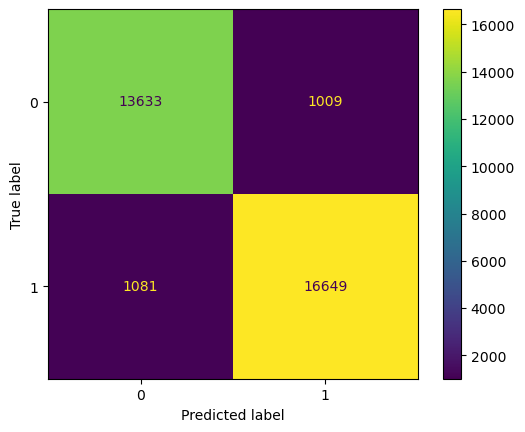

In [20]:
#Confusion metrix
cm= metrics.confusion_matrix(y_test, dt_pred, labels= decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= decision_tree.classes_)
disp.plot()

**Note**: the evaluation metrics seem to be too good, this might be an indication of overfitting in a decision tree classification model

In the confusion matrix, there are a high proportion of true positives and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively). 

The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.) 

**Plot the decision tree**

[Text(0.5, 0.875, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 97115\nvalue = [43963, 53152]'),
 Text(0.25, 0.625, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 43502\nvalue = [34098, 9404]'),
 Text(0.125, 0.375, 'Seat comfort <= 0.5\ngini = 0.247\nsamples = 38022\nvalue = [32531, 5491]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Seat comfort <= 4.5\ngini = 0.408\nsamples = 5480\nvalue = [1567, 3913]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Ease of Online booking <= 3.5\ngini = 0.3\nsamples = 53613\nvalue = [9865, 43748]'),
 Text(0.625, 0.375, 'Inflight entertainment <= 4.5\ngini = 0.485\nsamples = 14645\nvalue = [6063, 8582]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Customer Type_disloyal Customer <= 0.5\ngini = 0.176\nsamples = 38968\nvalue = [3802, 35166]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),


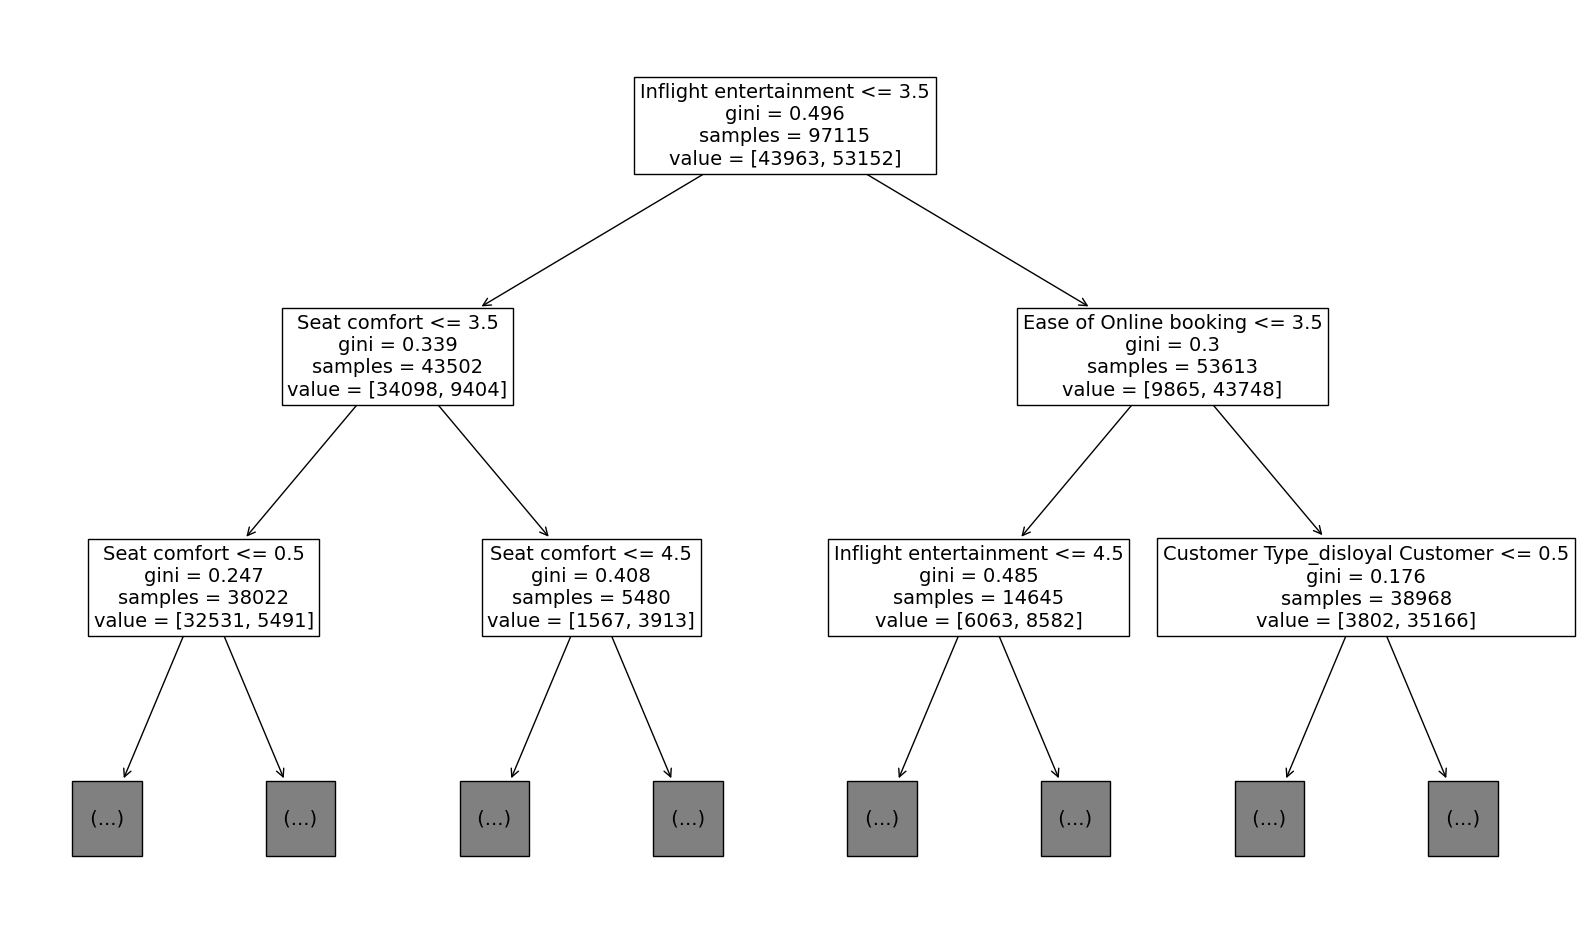

In [21]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns.tolist())

**Feature importance**

Feature importance tells us how important each feature is in making the decision tree's predictions. It is calculated by looking at how much each feature contributes to reducing impurity (e.g., Gini impurity) when the tree splits the data.

The `DecisionTreeClassifier` class comes with a [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute that provides access to the features' relative importance in the model. The feature importances are computed when the `fit()` method is called on the `DecisionTreeClassifier` instance. In other words, it's information that is generated during model training. Here's how it works.

For each feature used in the tree, the algorithm finds all of the decision nodes that use that particular feature as the split criterion. Then for each of those decision nodes it computes the decrease in Gini impurity (or entropy, or log loss, or whatever metric you select when you fit the model&mdash;default is Gini impurity) that results from that split (so, the decrease from parent to children). Then the algorithm sums up the decreases across all the decisions made using that feature and expresses it as a percentage of the total decrease that resulted from _all_ features. 

Here is a simple example of how you can calculate feature importance from a tree diagram. This tree splits 10 samples using two features, X<sub>1</sub> and X<sub>2</sub>:

<img src='./SR-003_build_a_decision_tree_graphic.png'/>

Notice that the reduction in Gini impurity is weighted based on how many samples are in each node. Ultimately, the reduction that results from each feature is normalized (i.e., expressed as a percentage), and this percentage represents the importance of a given feature.

This can be interpreted as: X<sub>1</sub> is responsible for 64.3% of the overall reduction of Gini impurity in the model, and X<sub>2</sub> is responsible for 35.7% of the overall reduction of Gini impurity in the model.

Using the `feature_importances_` attribute to fetch the relative importances of each feature, you can then plot the results. 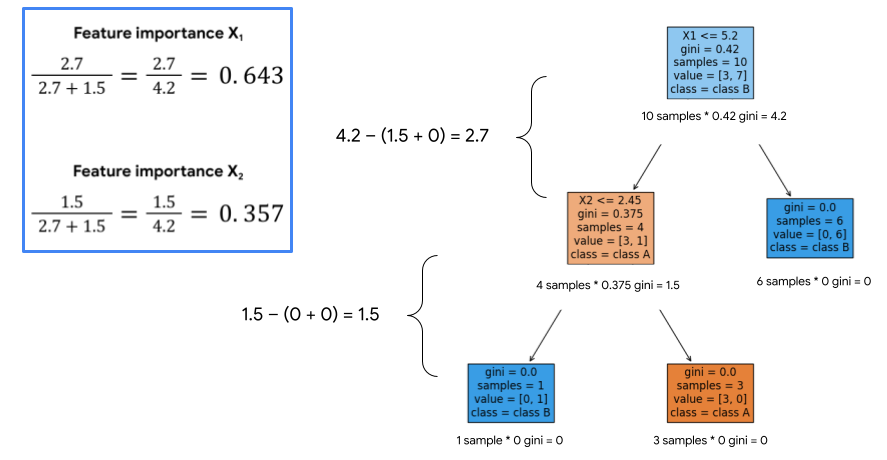

In [22]:
#See feature importance 
importances = decision_tree.feature_importances_
importances

array([0.02720557, 0.02310253, 0.03184228, 0.1755448 , 0.02379542,
       0.01524356, 0.0312355 , 0.00606686, 0.39108886, 0.0198069 ,
       0.06668664, 0.01104416, 0.01978549, 0.01426738, 0.01992733,
       0.01942585, 0.01129854, 0.01090341, 0.01311128, 0.04397377,
       0.02464388])

<Axes: >

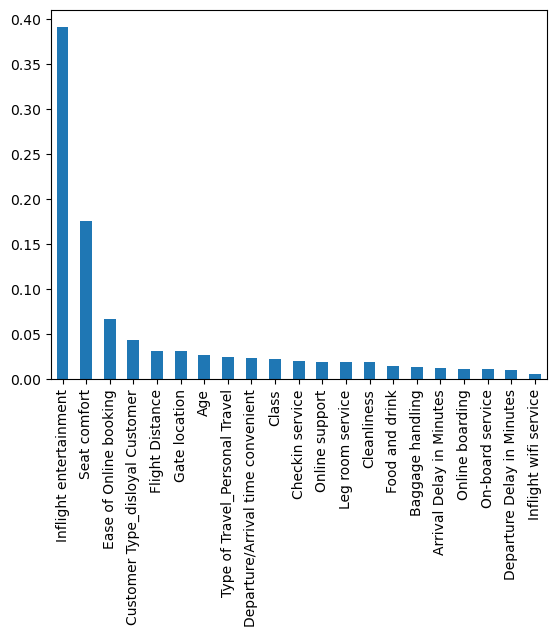

In [23]:
#put into a pandas series and visualize
visualize_importances = pd.Series(importances, index= X.columns).sort_values(ascending= False)
visualize_importances.plot.bar()

### 4. Model tuning 



In [24]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[1,3,6,9,12,15,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 
           'f1': 'f1', 
           'precision': 'precision', 
           'recall': 'recall'}

In [25]:
#instantiate the GridSearch 
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

KeyboardInterrupt: 

**Determine the best average validation score**

In [74]:
#Compute best avg validation score 
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9454


**Determine the "best" decision tree model's accuracy, precision, recall, and F1 score**

In [75]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864


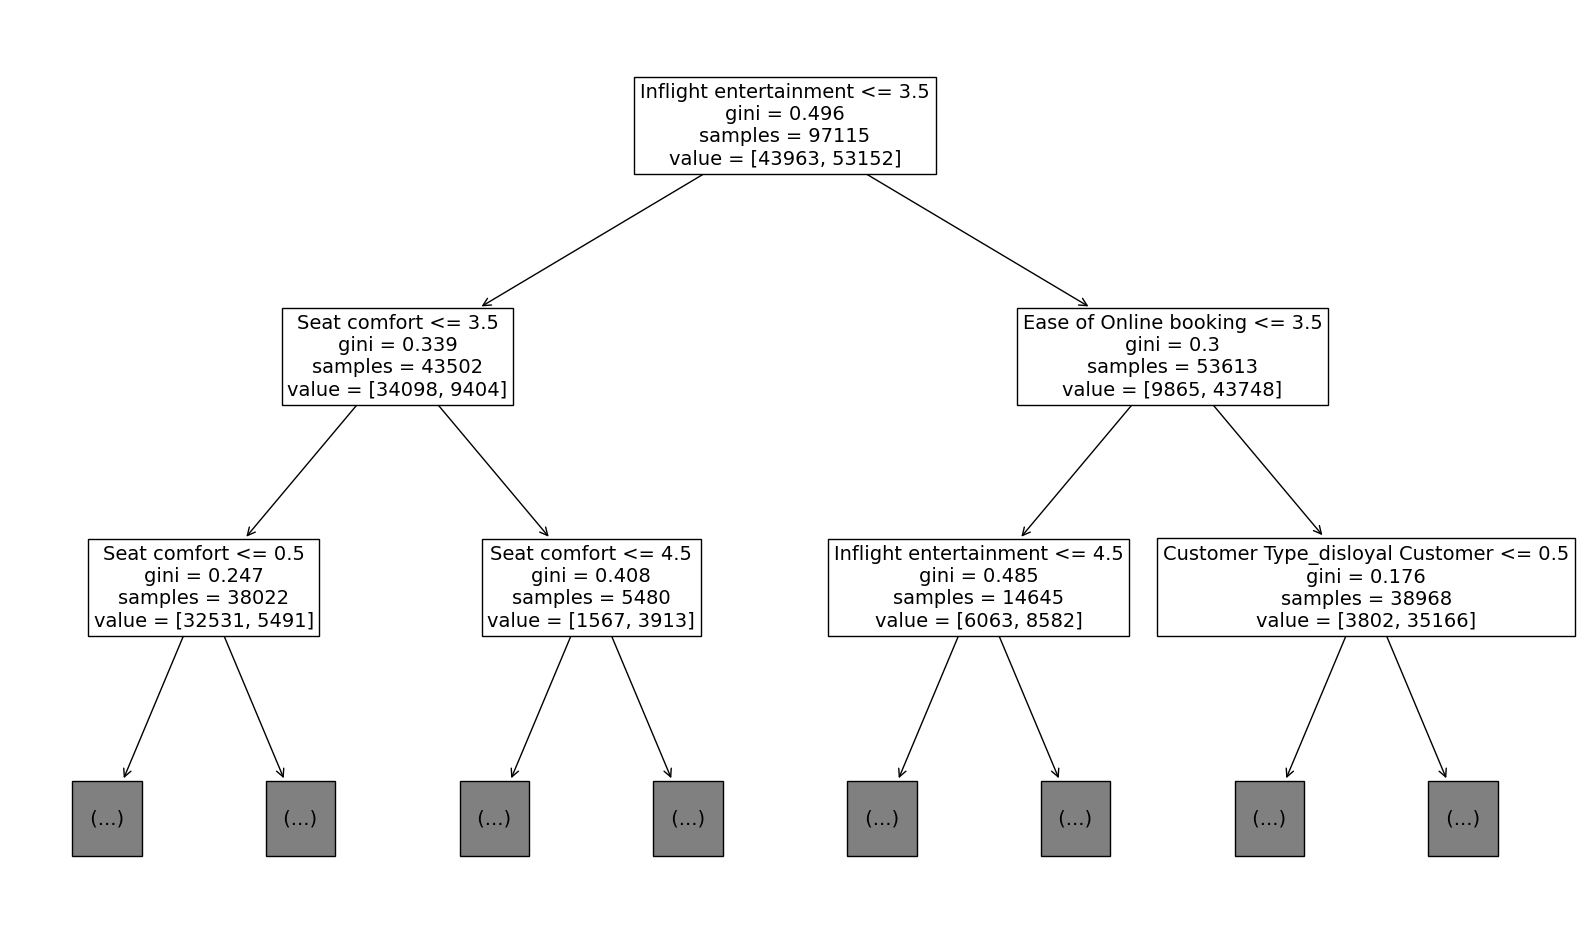

In [77]:
#Plot the best deicision tree 
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns.tolist()); 

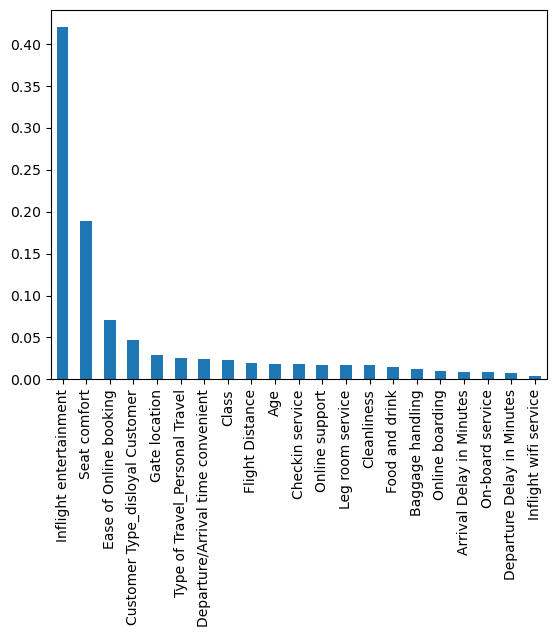

In [78]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the "most important" features for this model. 

## Considerations

**What are some key takeaways that you learned from this lab?**
*   Machine learning workflows may be used to clean and encode data for machine learning.
*   While hyperparameter tuning can lead to an increase in performance, it doesn't always. 
*   The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.


**What findings would you share with others?**
*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The confusion matrix is useful as it shows a similar number of true positives and true negatives. 
*   The visualization of the decision tree and the feature importance graph both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 